In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
customers_df = pd.read_csv('/content/Customers.csv')
products_df = pd.read_csv('/content/Products.csv')
transactions_df = pd.read_csv('/content/Transactions.csv')

In [25]:
print("=== Customers DataFrame ===")
print(customers_df.head())
print("-----------------------------")
print(customers_df.info())
print("-----------------------------")
print(customers_df.describe(include='all'))

=== Customers DataFrame ===
  CustomerID        CustomerName         Region SignupDate SignupMonth
0      C0001    Lawrence Carroll  South America 2022-07-10     2022-07
1      C0002      Elizabeth Lutz           Asia 2022-02-13     2022-02
2      C0003      Michael Rivera  South America 2024-03-07     2024-03
3      C0004  Kathleen Rodriguez  South America 2022-10-09     2022-10
4      C0005         Laura Weber           Asia 2022-08-15     2022-08
-----------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CustomerID    200 non-null    object        
 1   CustomerName  200 non-null    object        
 2   Region        200 non-null    object        
 3   SignupDate    200 non-null    datetime64[ns]
 4   SignupMonth   200 non-null    period[M]     
dtypes: datetime64[ns](1), object(3), period[M](1)
memory usag

In [26]:
print("=== Products DataFrame ===")
print(products_df.head())
print("-----------------------------")
print(products_df.info())
print("-----------------------------")
print(products_df.describe(include='all'))

=== Products DataFrame ===
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
-----------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None
-----------------------------
       ProductID            ProductName Category       Price
count        100                    100      100  100.000000
unique       100               

In [27]:
print("=== Transactions DataFrame ===")
print(transactions_df.head())
print("-----------------------------")
print(transactions_df.info())
print("-----------------------------")
print(transactions_df.describe(include='all'))

=== Transactions DataFrame ===
  TransactionID CustomerID ProductID     TransactionDate  Quantity  \
0        T00001      C0199      P067 2024-08-25 12:38:23         1   
1        T00112      C0146      P067 2024-05-27 22:23:54         1   
2        T00166      C0127      P067 2024-04-25 07:38:55         1   
3        T00272      C0087      P067 2024-03-26 22:55:37         2   
4        T00363      C0070      P067 2024-03-21 15:10:10         3   

   TotalValue   Price  
0      300.68  300.68  
1      300.68  300.68  
2      300.68  300.68  
3      601.36  300.68  
4      902.04  300.68  
-----------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TransactionID    1000 non-null   object        
 1   CustomerID       1000 non-null   object        
 2   ProductID        1000 non-null   object        
 3  

In [28]:
print("\n=== Missing Values (Customers) ===")
print(customers_df.isnull().sum())


=== Missing Values (Customers) ===
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
SignupMonth     0
dtype: int64


In [29]:
print("\n=== Missing Values (Products) ===")
print(products_df.isnull().sum())


=== Missing Values (Products) ===
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64


In [30]:
print("\n=== Missing Values (Transactions) ===")
print(transactions_df.isnull().sum())


=== Missing Values (Transactions) ===
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [32]:
merged_df = pd.merge(transactions_df, customers_df, on='CustomerID', how='left')

In [33]:
merged_df = pd.merge(merged_df, products_df, on='ProductID', how='left')

In [35]:
merged_df.rename(columns={'Price_x': 'TransactionPrice', 'Price_y': 'ProductPrice'}, inplace=True)

In [37]:
print("\n=== Merged DataFrame Head ===")
print(merged_df.head())


=== Merged DataFrame Head ===
  TransactionID CustomerID ProductID     TransactionDate  Quantity  \
0        T00001      C0199      P067 2024-08-25 12:38:23         1   
1        T00112      C0146      P067 2024-05-27 22:23:54         1   
2        T00166      C0127      P067 2024-04-25 07:38:55         1   
3        T00272      C0087      P067 2024-03-26 22:55:37         2   
4        T00363      C0070      P067 2024-03-21 15:10:10         3   

   TotalValue  TransactionPrice     CustomerName         Region SignupDate  \
0      300.68            300.68   Andrea Jenkins         Europe 2022-12-03   
1      300.68            300.68  Brittany Harvey           Asia 2024-09-04   
2      300.68            300.68  Kathryn Stevens         Europe 2024-04-04   
3      601.36            300.68  Travis Campbell  South America 2024-04-11   
4      902.04            300.68    Timothy Perez         Europe 2022-03-15   

  SignupMonth                      ProductName     Category  ProductPrice  
0  

In [39]:
print("\n=== Statistical Summary of Key Numeric Columns ===")
print(merged_df[['Quantity', 'TotalValue', 'TransactionPrice', 'ProductPrice']].describe())


=== Statistical Summary of Key Numeric Columns ===
          Quantity   TotalValue  TransactionPrice  ProductPrice
count  1000.000000  1000.000000        1000.00000    1000.00000
mean      2.537000   689.995560         272.55407     272.55407
std       1.117981   493.144478         140.73639     140.73639
min       1.000000    16.080000          16.08000      16.08000
25%       2.000000   295.295000         147.95000     147.95000
50%       3.000000   588.880000         299.93000     299.93000
75%       4.000000  1011.660000         404.40000     404.40000
max       4.000000  1991.040000         497.76000     497.76000


**Distribution of Transactions Over Time**

In [42]:
merged_df['YearMonth'] = merged_df['TransactionDate'].dt.to_period('M')
transactions_over_time = merged_df.groupby('YearMonth')['TransactionID'].count()

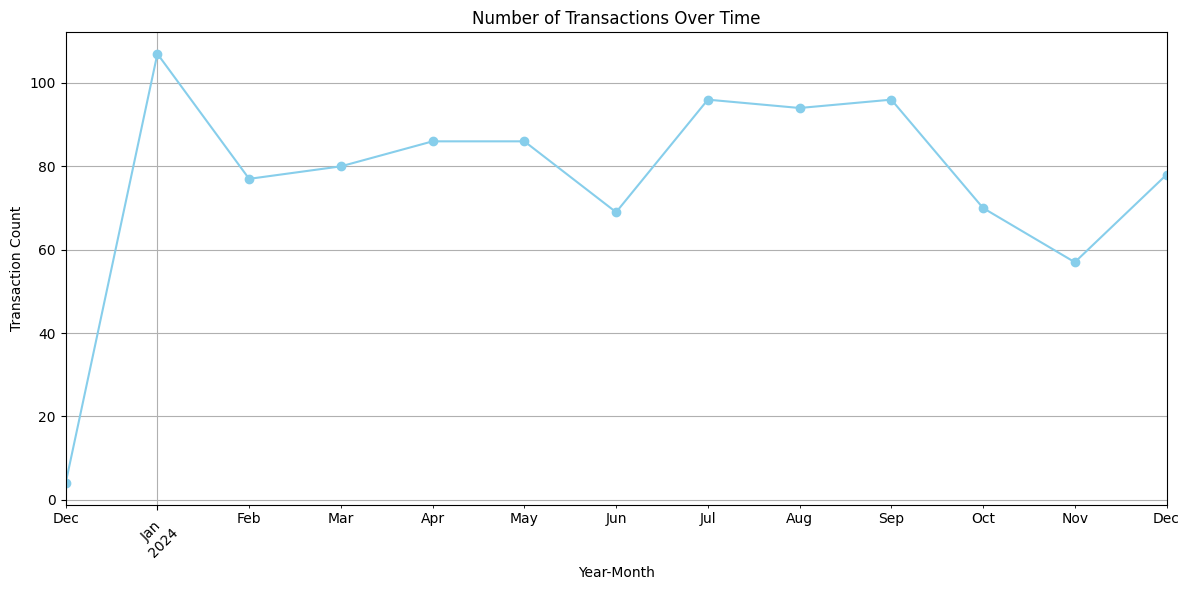

In [43]:
plt.figure(figsize=(12, 6))
transactions_over_time.plot(kind='line', marker='o', color='skyblue')
plt.title('Number of Transactions Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Transaction Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

**Top 10 Customers by TotalValue**

<ipython-input-45-f6b36359028d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_customers.values, y=top_customers.index.get_level_values(1), palette='viridis')


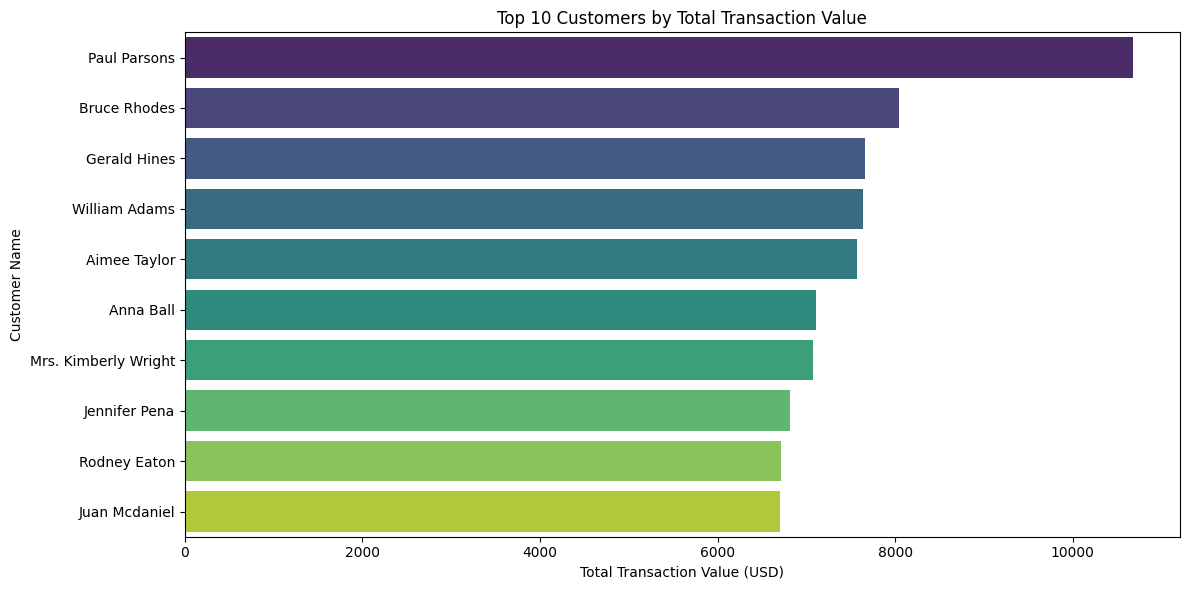

In [45]:
top_customers = merged_df.groupby(['CustomerID', 'CustomerName'])['TotalValue'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_customers.values, y=top_customers.index.get_level_values(1), palette='viridis')
plt.title('Top 10 Customers by Total Transaction Value')
plt.xlabel('Total Transaction Value (USD)')
plt.ylabel('Customer Name')
plt.tight_layout()
plt.show()

**Product Category Distribution **

<ipython-input-47-84ad47f31663>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.values, y=category_counts.index, palette='pastel')


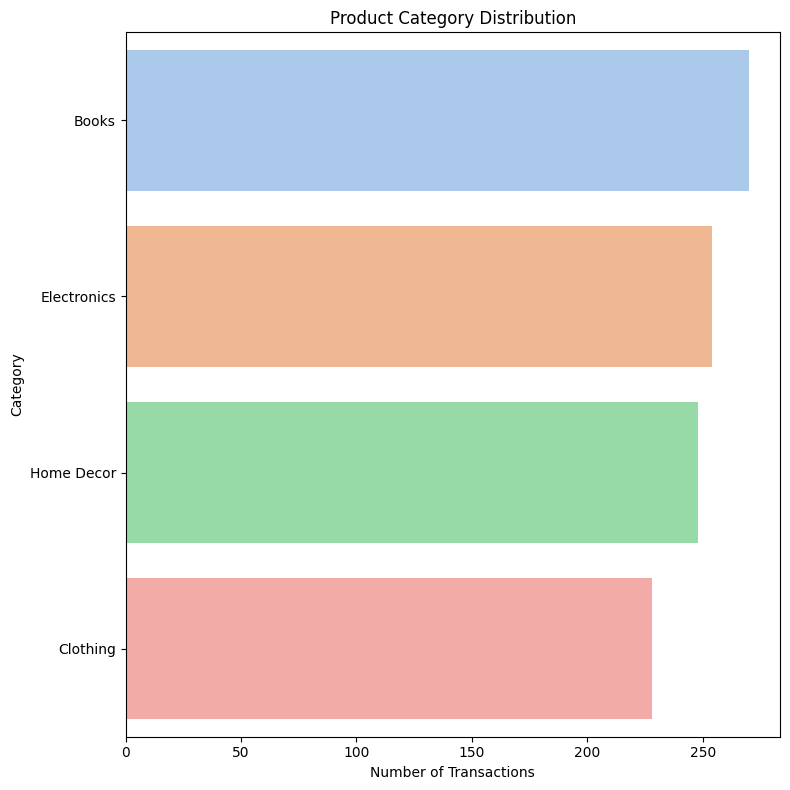

In [47]:
category_counts = merged_df['Category'].value_counts()
plt.figure(figsize=(8, 8))
sns.barplot(x=category_counts.values, y=category_counts.index, palette='pastel')
plt.title('Product Category Distribution')
plt.xlabel('Number of Transactions')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

**Average Spend per Region**

<ipython-input-48-2add5c03699f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_spend.values, y=region_spend.index, palette='coolwarm')


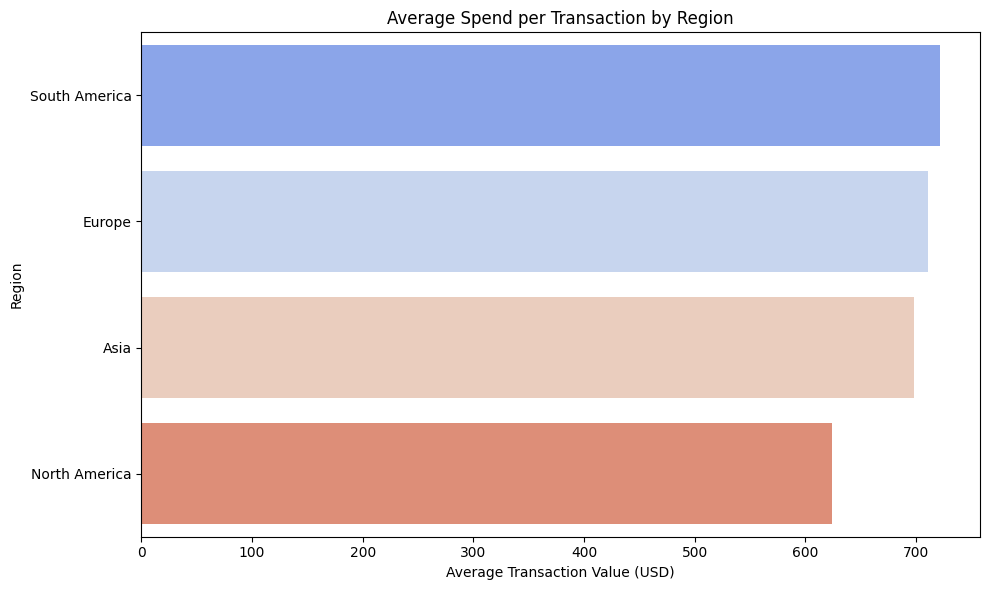

In [48]:
region_spend = merged_df.groupby('Region')['TotalValue'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=region_spend.values, y=region_spend.index, palette='coolwarm')
plt.title('Average Spend per Transaction by Region')
plt.xlabel('Average Transaction Value (USD)')
plt.ylabel('Region')
plt.tight_layout()
plt.show()

**Correlation Heatmap**

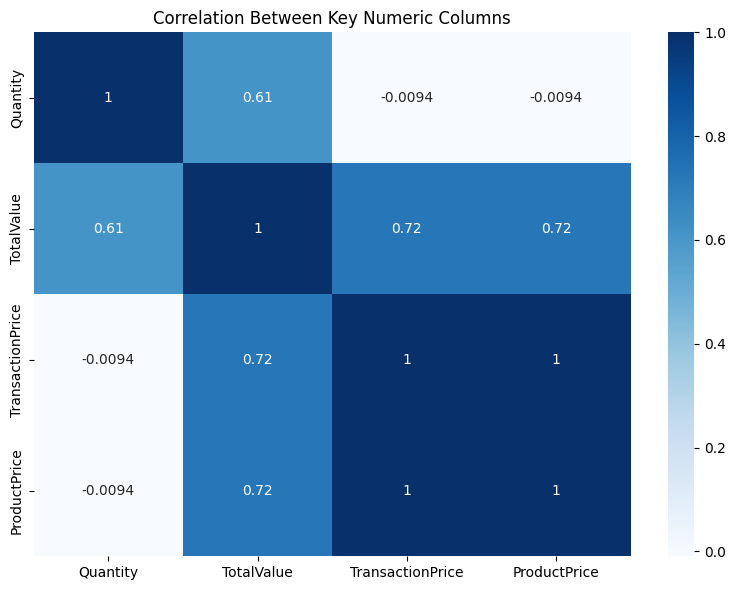

In [49]:
plt.figure(figsize=(8, 6))
sns.heatmap(merged_df[['Quantity','TotalValue','TransactionPrice','ProductPrice']].corr(), annot=True, cmap='Blues')
plt.title('Correlation Between Key Numeric Columns')
plt.tight_layout()
plt.show()

**Customer Distribution by Signup Year**

<ipython-input-53-80600f375876>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=signup_year_distribution.index.astype(str), y=signup_year_distribution.values, palette='Set2')


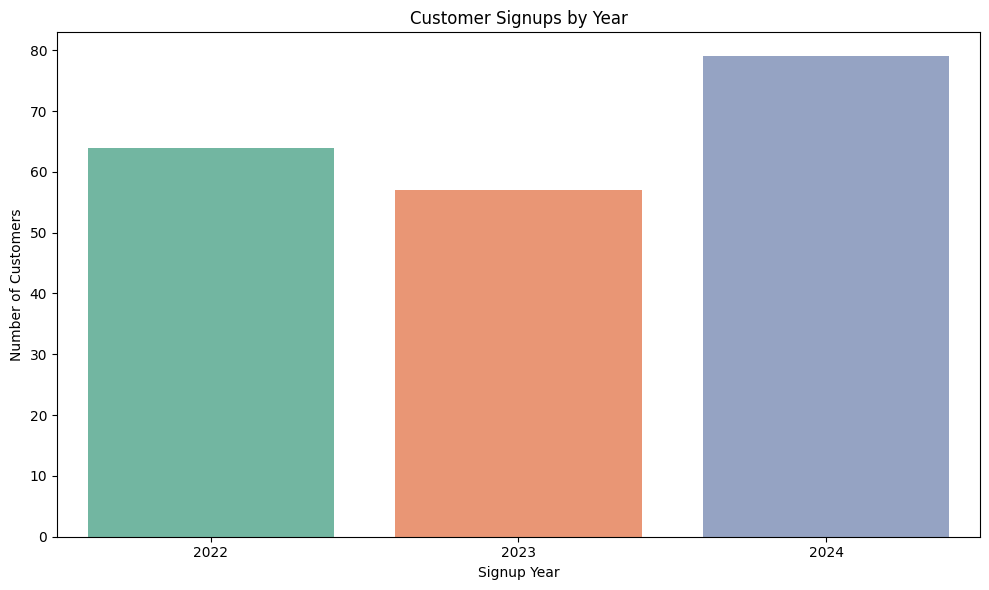

In [53]:
customers_df['SignupYear'] = customers_df['SignupDate'].dt.year
signup_year_distribution = customers_df['SignupYear'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.barplot(x=signup_year_distribution.index.astype(str), y=signup_year_distribution.values, palette='Set2')
plt.title('Customer Signups by Year')
plt.xlabel('Signup Year')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()